# LIBS

In [1]:
#import user modules
from helper_functions import *

#--- importet in user module
#import matplotlib.pyplot as plt
#import matplotlib
#from matplotlib.markers import MarkerStyle
#import os

#--- other modules
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
import math
import random
import imageio
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.optimize import curve_fit
from joblib import Parallel, delayed
#plt.style.use(['science','ieee','no-latex'])

# get all the colors
import matplotlib.colors as mcolors

print(dir)

../results/disorder/PBC/


# MODEL INPUT AND OTHER INFO

In [2]:

#--- CHOOSE WHAT TO PLOT
plot_info = {
    'vs':       'g',            # set parameter on x-axis
    'scaling':  'L',            # set scaling parameter (changing in legend)
    'x_scale':  'linear',       
    'y_scale':  'log',          
    'rescale':  1,              # rescale by Heisenberg time?
    'inverse':  0,              # inverse axis x -> 1/x^nu    
    'nu':       2               # power of inversion
}
if plot_info['inverse'] : plot_info['x_scale'] = 'log'
_options = ['L', 'J', 'g', 'h', 'w', 'k']
vs_idx = _options.index(plot_info['vs'])
scaling_idx = _options.index(plot_info['scaling'])
print(vs_idx, scaling_idx)

2 0


In [3]:
def set_plot_elements(axis, xlim =[], ylim=[], ylabel = 'y', set_legend = True, font_size = 10):
    axis.set(xlabel = r"$1\ /\ %s^{%.d}$"%(plot_info['vs'], plot_info['nu']) if plot_info['inverse'] else plot_info['vs'], ylabel = ylabel)
    axis.set_yscale(plot_info['y_scale'])
    axis.set_xscale(plot_info['x_scale'])
    
    if set_legend:
        axis.legend(frameon=False
                , loc='best'
                , fontsize=font_size)
                
    xmin, xmax = xlim
    ymin, ymax = ylim
    if xmin != None and xmax != None:
        axis.set_xlim([xmin,xmax])
    if ymin != None and ymax != None:
        axis.set_ylim([ymin, ymax])

In [4]:

#-------------------------- MODEL PARAMETERS
L = 12
J = 1.00
g = 0.90
h = 0.80
#---- DISORDER PARAMETERS
w = 1.00
J0 = 0.0
g0 = 0.0
#---- SYMETRY PARAMETERS
k_sym = 0
p_sym = 1
x_sym = 1

base_info = info(L, J, J0, g, g0, h, w, k_sym, p_sym, x_sym)

# SPECTRAL FORM FACTOR

# THOULESS TIME

In [5]:
dir_th = dir + f"ThoulessTime{kPSep}"
#--- GENERAL
def load_taus():
    name = dir_th + "_all" + (",p=%d,x=%d.dat"%(p_sym, x_sym) if model else ",J0=%.2f,g0=%.2f.dat"%(J0, g0))
    tau_data = np.loadtxt(name, unpack=True)
    return np.array(tau_data)
   

### PREAMBLE - FIND DATA

In [6]:
#--- SET SCALING RANGES AND DATA
x0 = 0.2
xend = 1.95
dx = 0.1
length = int((xend-x0) / dx) + 1
#--- prepare scaling - axis
dummy_table = range(0, L) if model else np.array(range(5, 150, 5)) / 100.0 #[0.1, 0.3, 0.5, 1.0, 1.5]
vals = []
if scaling_idx == 0:
    vals = range(10, 17)
elif scaling_idx > 3:
    vals = dummy_table
else :
    for x in range(0, length) :
        vals.append(x0 + x * dx)
vals = np.array(vals)

#--- compare all parameters except the scaling and vs one
def compare_params(tau_data, row, params_arr):
    bool = 1
    for i in range(0, 5) :
        if i != vs_idx:
            bool = bool and (abs(tau_data[i][row] - params_arr[i]) <= 1e-10)
    return bool

def get_tau_data(tau_data, params_arr) : 
    vs_column = tau_data[vs_idx]
    taus = {}
    for i in range(0, len(vs_column)): 
        if(compare_params(tau_data, i, params_arr)):
            par = vs_column[i]
            taus[f"%.5f"%(par)] = (tau_data[5][i] * tau_data[6][i], tau_data[7][i])
    
    x_float = [];   tau = [];   gap = []
    if taus:
        lists = sorted(taus.items())
        x, data = zip(*lists)
        for j in range(0, len(x)) : 
            tau.append(data[j][0]); gap.append(data[j][1]); x_float.append(float(x[j]))
    
    return np.array(x_float), np.array(tau), np.array(gap)

#----- find data
tau = []
xvals = []
gap_ratio = []
idx = 0
params_arr = [L, J, g, h, w, k_sym]
print_vars(params_arr, _options)

tau_data = load_taus()
num_of_plots = 0
new_vals = []
for x in vals:
    params_arr[scaling_idx] = x
    new_x, new_tau, new_gap = get_tau_data(tau_data, params_arr)
    if new_tau.size > 1 :
        xvals.append(new_x)
        tau.append(new_tau)
        gap_ratio.append(new_gap)
        num_of_plots = num_of_plots + 1
        new_vals.append(x)

vals = np.array(new_vals)

xvals = np.array(xvals)
tau = np.array(tau)

print(vals)
#print(tau)
#print(gap_ratio)    
    
    

L=12
J=1.00
g=0.90
h=0.80
w=1.00
k=0
[10 11 12 13 14 15 16]


### PLOT DATA

L=16
J=1.00
g=0.90
h=0.80
w=1.00
k=0


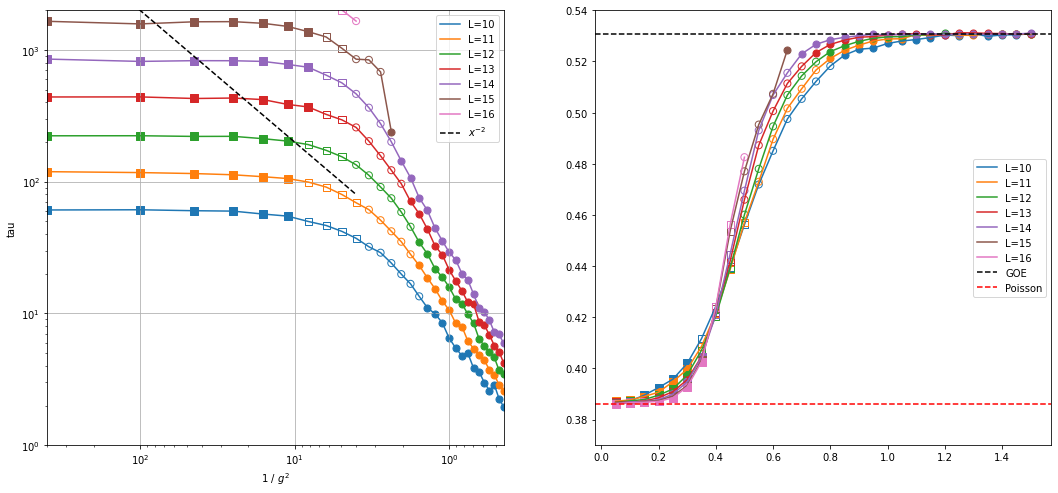

In [7]:
#--- set initial plot settings
fig, (axis1, axis2) = plt.subplots(1,2)
fig.set_size_inches(18,8)
def key_title(x):
    return plot_info['scaling'] + (f"=%d"%(vals[i]) if scaling_idx == 0 else f"=%.2f"%(vals[i]))
def xform(x) :
    return x if plot_info['inverse'] == 0 else 1. / x**plot_info['nu']

def get_fill_style(gap_ratio) :
    return 


#--- plot
marker_style = [];  face_colors = [];   ec = []
for i in range(0, num_of_plots):
    p = axis1.plot(xform(xvals[i]), tau[i], label=key_title(vals[i]))
    m = []; fc = [];    ec.append(p[0].get_color())
    for r in gap_ratio[i]: 
        m.append( 's' if r <= 0.46 else 'o')
        fc.append( p[0].get_color() if ( abs(r-0.53) <= 0.01 or abs(r-0.3865) <= 0.02 ) else 'none' )
    for j in range(0, len(tau[i])) :
        axis1.scatter(xform(xvals[i][j]), tau[i][j], edgecolors=ec[i], marker=m[j], s=50, facecolor=fc[j])
    marker_style.append(m); face_colors.append(fc)

axis1.plot(xform(xvals[i]), 2e1 / xvals[i]**2, ls='--', color='black', label=r'$x^{-2}$')
#axis1.plot(xform(xvals[i]), 2e0*np.exp(0.75/xvals[i]**plot_info['nu']), ls='--', color='red', label=r'$exp(1/x^{%d})$'%(plot_info['nu']))
set_plot_elements(axis1, [xform(0.05), xform(1.5)], (1e0, 2e3), 'tau')
axis1.grid()

axis1.legend()
for i in range(0, num_of_plots):
    axis2.plot(xvals[i], gap_ratio[i], label=key_title(vals[i]))
    for j in range(0, len(tau[i])) :
        axis2.scatter(xvals[i][j], gap_ratio[i][j], edgecolors=ec[i], marker=marker_style[i][j], s=50, facecolor=face_colors[i][j])
axis2.set_ylim(0.37, 0.54)
axis2.axhline(y=0.5307, ls='--', color='black', label='GOE')
axis2.axhline(y=0.3863, ls='--', color='red', label='Poisson')
axis2.legend()
print_vars(params_arr, _options)
plt.show()